<a href="https://colab.research.google.com/github/Pragna235/ML-Assignments/blob/main/Advertising_Data_Analysis_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary modules and libraries

In [ ]:
#Import necessary libraries and modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import plotly.express as px
import plotly.graph_objects as gp

import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
import pylab as py

import statsmodels.api as sm


# Reading dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the advertising dataset
dataset = pd.read_csv("/content/drive/MyDrive/Advertising.csv")
dataset

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Dataset Analysis

In [ ]:
# Print first 5 rows of the dataset
dataset.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# Print last 5 rows of the dataset
dataset.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
# Print the number of rows and columns in the dataset
dataset.shape

(200, 5)

# Checking for missing and duplicate values...


In [ ]:
dataset.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There are no missing values in the dataset

In [ ]:
dataset[dataset.duplicated()]

,Unnamed: 0,TV,radio,newspaper,sales


There are no duplicate rows

In [ ]:
dataset.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
dataset = dataset.drop('Unnamed: 0',axis=1)
dataset

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


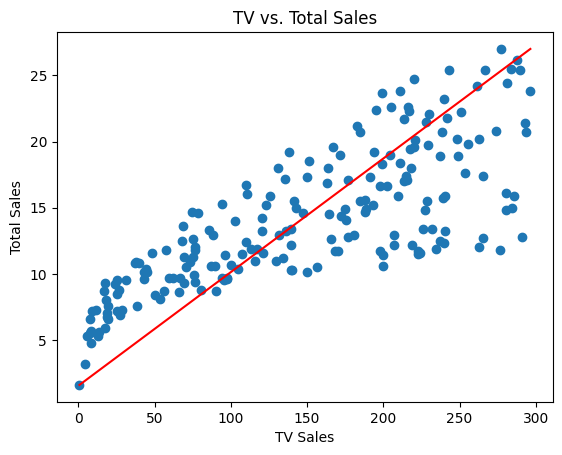

In [ ]:
plt.scatter(dataset['TV'], dataset['sales'])
plt.xlabel('TV Sales')
plt.ylabel('Total Sales')
plt.title('TV vs. Total Sales')
plt.plot([min(dataset['TV']), max(dataset['TV'])], [min(dataset['sales']), max(dataset['sales'])], color='red')  # Diagonal line for reference
plt.show()

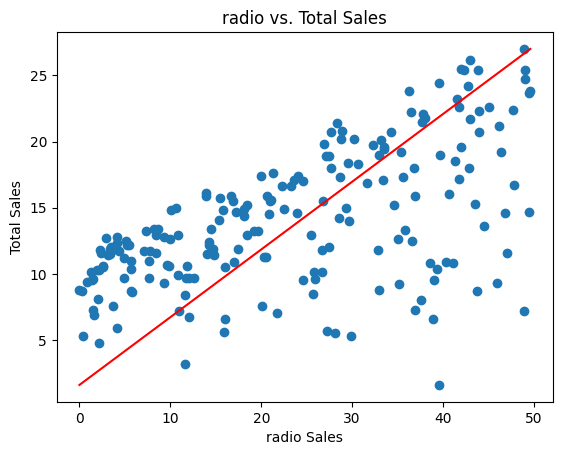

In [ ]:
plt.scatter(dataset['radio'], dataset['sales'])
plt.xlabel('radio Sales')
plt.ylabel('Total Sales')
plt.title('radio vs. Total Sales')
plt.plot([min(dataset['radio']), max(dataset['radio'])], [min(dataset['sales']), max(dataset['sales'])], color='red')  # Diagonal line for reference
plt.show()

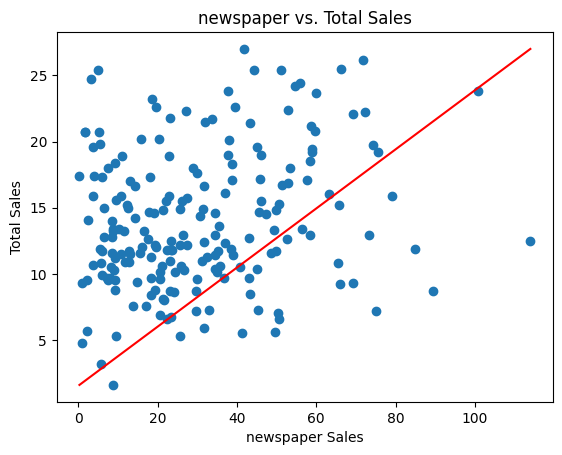

In [ ]:
plt.scatter(dataset['newspaper'], dataset['sales'])
plt.xlabel('newspaper Sales')
plt.ylabel('Total Sales')
plt.title('newspaper vs. Total Sales')
plt.plot([min(dataset['newspaper']), max(dataset['newspaper'])], [min(dataset['sales']), max(dataset['sales'])], color='red')  # Diagonal line for reference
plt.show()

From this, we can observe that TV features is aligning a lot with the sales feature. So, let's build a model relating the TV and sales features.

# Model Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

x = dataset['TV'].values.reshape(-1,1)
y = dataset['sales'].values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([[14.81785392],
       [16.30754437],
       [20.83230507],
       [ 7.78243112],
       [17.46309864],
       [10.72468577],
       [17.30067133],
       [ 9.55984994],
       [17.56055502],
       [15.36546598],
       [ 8.7013056 ],
       [ 9.84757831],
       [18.12208943],
       [ 7.49006196],
       [13.71334823],
       [15.13806775],
       [ 7.57823679],
       [16.40964153],
       [10.73396733],
       [18.25667206],
       [17.89005042],
       [10.38590882],
       [ 9.00295631],
       [18.88317738],
       [10.44159818],
       [ 9.72227724],
       [17.14752559],
       [13.70406667],
       [11.28622018],
       [ 7.62928537],
       [16.5117387 ],
       [10.45087974],
       [16.46997167],
       [ 8.02375169],
       [20.26612989],
       [18.2937983 ],
       [ 9.48095667],
       [19.94127527],
       [12.67845424],
       [ 8.51567439],
       [12.62276488],
       [15.45364081],
       [ 9.2396361 ],
       [10.1306659 ],
       [17.63480751],
       [ 9

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

8.970991242413614


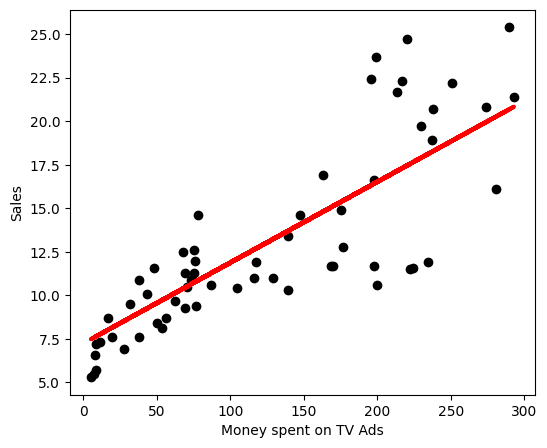

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(x_test,y_test,c='black')

plt.plot(x_test,y_pred,c='red',linewidth=3)

plt.xlabel("Money spent on TV Ads")
plt.ylabel("Sales")
plt.show()

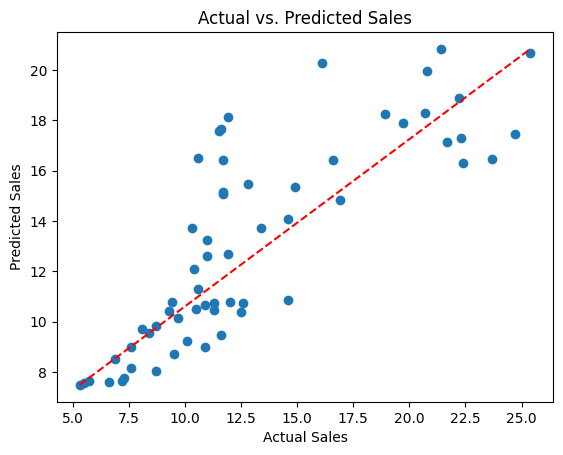

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='--')  # Diagonal line for reference
plt.show()